True: 39.0, Pred [ 35.43976212]


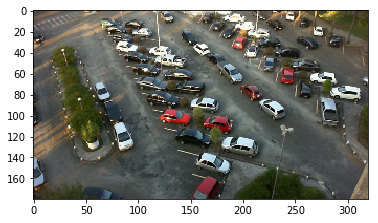

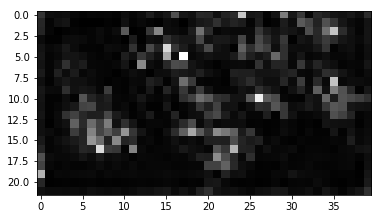

In [12]:
import numpy as np
from keras.models import load_model
from keras import backend as K

from matplotlib import pyplot as plt
from data import Dataset, Dataloader
from model import IMG_WIDTH, IMG_HEIGHT
%matplotlib inline  


def decode(x):
    return ((x + 1.0) * 0.5 * 255).astype(np.uint8)


model = load_model('../models/2017-10-07-00-00-03.hdf5')
ds = Dataset()
gen = Dataloader(ds.X, ds.y, IMG_WIDTH, IMG_HEIGHT)
X, y = gen[0]

seed_img = X[:1]
compute_fn = K.function([model.input, K.learning_phase()], [model.layers[-2].output, model.output])
activations, pred = compute_fn([seed_img, 0])

print("True: {}, Pred {}".format(y[0], pred[0]))
plt.imshow(decode(seed_img[0]))
plt.show()

plt.imshow(activations[0, ..., 0], cmap='gray')
plt.show()